<a href="https://colab.research.google.com/github/imankassim/Purchase_from_ad_logreg/blob/master/Purchase_from_ad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Buying items from advertisements on social media

# DATA
The dataset comes from Kaggle, and is data collected from an ad company advertising their products (T-Shirts) online. The data shows whether or not a social media user who viewed the ad bought the product or not.

This analysis can be used to focus ads on one specific group of people in order to keep costs down.

I will be using a logistic regession model for the classification - where the goal is to predict whether the user will purchase the item or not.

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data=pd.read_csv('https://social-network-ads-dataset.s3.eu-west-2.amazonaws.com/Social_Network_Ads.csv', header=0)
data=data.dropna()
print(data.shape)
print(list(data.columns))

(400, 5)
['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']


In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
#user ID column has no relevance so deleted
del data['User ID']

In [7]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
#change male to 1 and female to 2
data["Gender"].replace({"Male": 1, "Female": 2}, inplace=True)

In [9]:
#AGE - increments of 14 years
#Group ages - 32 and under = 1, 33-46 = 2, 47-60 = 3
for i in range(18, 33):
  data["Age"].replace({i: 1}, inplace=True)
for i in range(33, 47):
  data["Age"].replace({i: 2}, inplace=True)
for i in range(47, 61):
  data["Age"].replace({i: 3}, inplace=True)

In [10]:
#Estimated salary
#0-19,999 =1, 20,000-29,999 =2 etc
for i in range(0, 20000):
  data["EstimatedSalary"].replace({i: 1}, inplace=True)
for i in range(20000, 30000):
  data["EstimatedSalary"].replace({i: 2}, inplace=True)
for i in range(30000, 40000):
  data["EstimatedSalary"].replace({i: 3}, inplace=True)
for i in range(40000, 50000):
  data["EstimatedSalary"].replace({i: 4}, inplace=True)
for i in range(50000, 60000):
  data["EstimatedSalary"].replace({i: 5}, inplace=True)
for i in range(60000, 70000):
  data["EstimatedSalary"].replace({i: 6}, inplace=True)
for i in range(70000, 80000):
  data["EstimatedSalary"].replace({i: 7}, inplace=True)
for i in range(80000, 90000):
  data["EstimatedSalary"].replace({i: 8}, inplace=True)
for i in range(90000, 100000):
  data["EstimatedSalary"].replace({i: 9}, inplace=True)
for i in range(100000, 110000):
  data["EstimatedSalary"].replace({i: 10}, inplace=True)
for i in range(110000, 120000):
  data["EstimatedSalary"].replace({i: 11}, inplace=True)
for i in range(120000, 130000):
  data["EstimatedSalary"].replace({i: 12}, inplace=True)
for i in range(130000, 140000):
  data["EstimatedSalary"].replace({i: 13}, inplace=True)
for i in range(140000, 150000):
  data["EstimatedSalary"].replace({i: 14}, inplace=True)
for i in range(150000, 160000):
  data["EstimatedSalary"].replace({i: 15}, inplace=True)

In [11]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,1,1,0
1,1,2,2,0
2,2,1,4,0
3,2,1,5,0
4,1,1,7,0


# DATA EXPLORATION

In [12]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

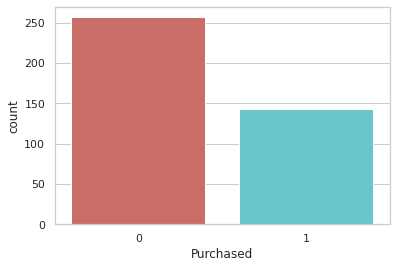

<Figure size 432x288 with 0 Axes>

In [13]:
sns.countplot(x='Purchased', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [14]:
count_no_buy = len(data[data['Purchased']==0])
count_buy = len(data[data['Purchased']==1])
pct_of_no_buy = count_no_buy/(count_no_buy+count_buy)
print("percentage of users who bought the product advertised: ", pct_of_no_buy*100)
pct_of_buy = count_buy/(count_no_buy+count_buy)
print("percentage of users who didn't buy the product advertised: ", pct_of_buy*100)

percentage of users who bought the product advertised:  64.25
percentage of users who didn't buy the product advertised:  35.75


In [15]:
data.groupby('Purchased').mean()

,Gender,Age,EstimatedSalary
Purchased,,,
0,1.494163,1.575875,5.622568
1,1.538462,2.482517,8.181818


Observations:
- On average, more women than men purchased the product in the advertisement
- Older people, on average, are more likely to purchase the product
- On average, a higher salary makes people more likely to buy the product

I will calculate categorical averages for other variables to get a more detailed sense of the data.

In [16]:
data.groupby('Gender').mean()

,Age,EstimatedSalary,Purchased
Gender,,,
1,1.841837,6.321429,0.336735
2,1.955882,6.745098,0.377451


In [17]:
data.groupby('Age').mean()

,Gender,EstimatedSalary,Purchased
Age,,,
1,1.488550,5.885496,0.091603
2,1.477528,6.735955,0.280899
3,1.604396,7.087912,0.890110


In [18]:
data.groupby('EstimatedSalary').mean()

,Gender,Age,Purchased
EstimatedSalary,,,
1,1.333333,1.000000,0.000000
2,1.526316,2.026316,0.473684
3,1.588235,2.147059,0.500000
4,1.548387,2.032258,0.258065
5,1.448980,1.755102,0.040816
6,1.531250,1.812500,0.062500
7,1.403226,1.903226,0.193548
8,1.490196,1.509804,0.196078
9,1.571429,2.071429,0.785714


# Visualisations

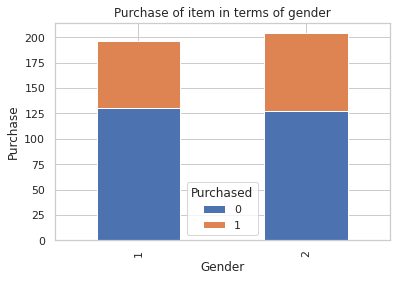

In [19]:
%matplotlib inline
pd.crosstab(data.Gender,data.Purchased).plot(kind='bar', stacked=True)
plt.title('Purchase of item in terms of gender')
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.savefig('purchase_gender')

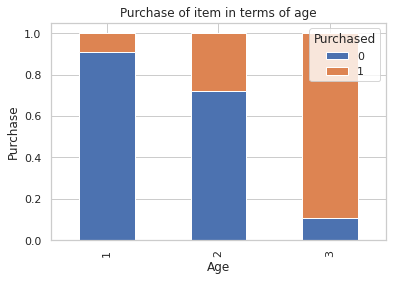

In [21]:
table=pd.crosstab(data.Age,data.Purchased)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Purchase of item in terms of age')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.savefig('purchase_age')

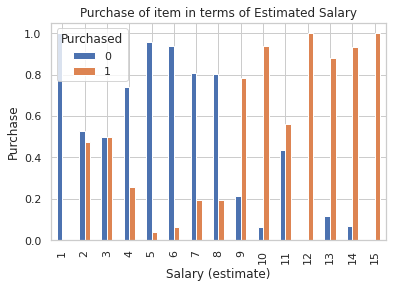

In [22]:
table=pd.crosstab(data.EstimatedSalary,data.Purchased)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Purchase of item in terms of Estimated Salary')
plt.xlabel('Salary (estimate)')
plt.ylabel('Purchase')
plt.savefig('purchase_salary')

Both the Estimated salary AND the age seem like good indicatiors of the outcome variables - however gender does not.

Most people who purchased the item are earning an estimated salary of £90,000 +

The 47-60 age group were also the biggest purchesers 

# Create dummy variables
Variables with either a 1 or 0  - this allows us to use a single regression equation instead of a multi-regression equation - keeping it simpler!


In [25]:
cat_vars=['Gender','Age', 'EstimatedSalary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['gender', 'age', 'EstimatedSalary']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [26]:
data_final=data[to_keep]
data_final.columns.values

array(['Gender', 'Age', 'Purchased', 'Gender_1', 'Gender_2', 'Age_1',
       'Age_2', 'Age_3', 'EstimatedSalary_1', 'EstimatedSalary_2',
       'EstimatedSalary_3', 'EstimatedSalary_4', 'EstimatedSalary_5',
       'EstimatedSalary_6', 'EstimatedSalary_7', 'EstimatedSalary_8',
       'EstimatedSalary_9', 'EstimatedSalary_10', 'EstimatedSalary_11',
       'EstimatedSalary_12', 'EstimatedSalary_13', 'EstimatedSalary_14',
       'EstimatedSalary_15'], dtype=object)

# Over-sampling using SMOTE

SMOTE, which stands for 'synthetic minority oversampling technique' is used to balance class distribution to solve imbalance problems in the data. It is one of the most common types of oversampling used. Here, it is used to balance my data.

In [35]:
data_final.dtypes

Gender                int64
Age                   int64
Purchased             int64
Gender_1              uint8
Gender_2              uint8
Age_1                 uint8
Age_2                 uint8
Age_3                 uint8
EstimatedSalary_1     uint8
EstimatedSalary_2     uint8
EstimatedSalary_3     uint8
EstimatedSalary_4     uint8
EstimatedSalary_5     uint8
EstimatedSalary_6     uint8
EstimatedSalary_7     uint8
EstimatedSalary_8     uint8
EstimatedSalary_9     uint8
EstimatedSalary_10    uint8
EstimatedSalary_11    uint8
EstimatedSalary_12    uint8
EstimatedSalary_13    uint8
EstimatedSalary_14    uint8
EstimatedSalary_15    uint8
dtype: object

In [36]:
X = data_final.loc[:, data_final.columns != 'Purchased']
y = data_final.loc[:, data_final.columns == 'Purchased']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Purchased'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-sales in oversampled data",len(os_data_y[os_data_y['Purchased']==0]))
print("Number of sales",len(os_data_y[os_data_y['Purchased']==1]))
print("Proportion of non-sale data in oversampled data is ",len(os_data_y[os_data_y['Purchased']==0])/len(os_data_X))
print("Proportion of sale data in oversampled data is ",len(os_data_y[os_data_y['Purchased']==1])/len(os_data_X))

length of oversampled data is  356
Number of non-sales in oversampled data 178
Number of sales 178
Proportion of non-sale data in oversampled data is  0.5
Proportion of sale data in oversampled data is  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Recursive Feature Elimination
RFE is a feature selection method that fits a model, and removes the weakest features. This allows for the elimination of dependencies and collinearity in the data.

In [37]:
data_final_vars=data_final.columns.values.tolist()
y=['Purchased']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True False]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 3]


RFE has shown which columns to use and which to remove. This shows I should remove EstimatedSalary_11 and EstimatedSalary_15

In [38]:
cols=['Gender', 'Age', 'Gender_1', 'Gender_2', 'Age_1','Age_2', 'Age_3', 'EstimatedSalary_1', 'EstimatedSalary_2','EstimatedSalary_3', 'EstimatedSalary_4', 'EstimatedSalary_5','EstimatedSalary_6', 'EstimatedSalary_7', 'EstimatedSalary_8','EstimatedSalary_9', 'EstimatedSalary_10', 'EstimatedSalary_12', 'EstimatedSalary_13', 'EstimatedSalary_14']
X=os_data_X[cols]
y=os_data_y['Purchased']

# Implementing the model

In [39]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: inf
         Iterations: 35
                                          Results: Logit
Model:                           Logit                        Pseudo R-squared:             -inf   
Dependent Variable:              Purchased                    AIC:                          inf    
Date:                            2020-09-08 16:31             BIC:                          inf    
No. Observations:                356                          Log-Likelihood:               -inf   
Df Model:                        18                           LL-Null:                      -246.76
Df Residuals:                    337                          LLR p-value:                  1.0000 
Converged:                       0.0000                       Scale:                        1.0000 
No. Iterations:                  35.0000                                                           
----------------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in le

The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them. Gender 1 and 2 give NAN values, so I'll remove those too.

In [43]:
cols=['Gender', 'Age', 'Age_1','Age_2', 'Age_3', 'EstimatedSalary_1', 'EstimatedSalary_2','EstimatedSalary_3', 'EstimatedSalary_4', 'EstimatedSalary_5','EstimatedSalary_6', 'EstimatedSalary_7', 'EstimatedSalary_8','EstimatedSalary_9']
X=os_data_X[cols]
y=os_data_y['Purchased']

In [44]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.256387
         Iterations: 35
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.630     
Dependent Variable:         Purchased                AIC:                      210.5479  
Date:                       2020-09-08 16:36         BIC:                      264.7969  
No. Observations:           356                      Log-Likelihood:           -91.274   
Df Model:                   13                       LL-Null:                  -246.76   
Df Residuals:               342                      LLR p-value:              1.2126e-58
Converged:                  0.0000                   Scale:                    1.0000    
No. Iterations:             35.0000                                                      
-----------------------------------------------------------------------------------------
                   Coef.      Std.Err.       z    P>|z|       [0.025    

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Logistic Regression Model Fitting

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the test set results and calculating the accuracy

In [48]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


# Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[47  8]
 [ 6 46]]


The results show there are 47+46 correct predictions and 8+6 incorrect predictions!

# Compute precision, recall, F-measure and support

Recall - The total number of True positives and False negatives (finds all positive samples) 

Support - The number of occurances in the test set

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        55
           1       0.85      0.88      0.87        52

    accuracy                           0.87       107
   macro avg       0.87      0.87      0.87       107
weighted avg       0.87      0.87      0.87       107



# ROC Curve
This curve is used to show the accuracy of my model in comparison to a standard model

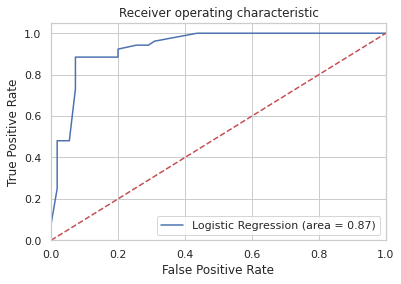

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()